In [1]:
# Import the Earth Engine package, installing it first, if needed.
try:
    import ee
except ModuleNotFoundError:
    !pip install earthengine-api
    import ee
    

In [2]:
import pprint
from IPython.display import Image

In [3]:
# Import the SSEBop package, installing it first, if needed.
try:
    import openet.ssebop as model
    print('worked')
except ModuleNotFoundError:
    !pip install openet-ssebop
    import openet.ssebop as model

worked


In [4]:
try:
    ee.Initialize()
    print('worked')
except ee.EEException:
    print('trying a second time')
    ee.Authenticate()
    ee.Initialize()

worked


In [5]:
ndvi_palette = ['#EFE7E1', '#003300']
et_palette = [
    'DEC29B', 'E6CDA1', 'EDD9A6', 'F5E4A9', 'FFF4AD', 'C3E683', '6BCC5C', 
    '3BB369', '20998F', '1C8691', '16678A', '114982', '0B2C7A']
viridis_palette = ['440154', '433982', '30678D', '218F8B', '36B677', '8ED542', 'FDE725']


image_size = 768

In [10]:
# Salinas
# landsat_img = ee.Image('LANDSAT/LC08/C02/T1_L2/LC08_043035_20160722')
# Wilcox
# landsat_img = ee.Image('LANDSAT/LC08/C02/T1_L2/LC08_035037_20160714')
x = 'LC08_035037_20160714'
landsat_img = ee.Image(f'LANDSAT/LC08/C02/T1_L2/{x}')
landsat_crs = landsat_img.select('SR_B3').projection().getInfo()['crs']
landsat_region = landsat_img.geometry().bounds(1, 'EPSG:4326')
landsat_dt = ee.Date(landsat_img.get('system:time_start'))

In [14]:
# Build the SSEBop object from the Landsat image
model_obj = model.Image.from_landsat_c2_sr(
    landsat_img, 
#     tcorr_source='GRIDDED_COLD',
    tcorr_source='projects/earthengine-legacy/assets/projects/usgs-ssebop/tcorr_gridded/c02/daymet_v4_mean_1981_2010_elr',
    et_reference_source='IDAHO_EPSCOR/GRIDMET', 
    et_reference_band='etr', 
    et_reference_factor=0.85,
    et_reference_resample='nearest',
    tmax_source='projects/usgs-ssebop/tmax/daymet_v4_mean_1981_2010_elr'
)


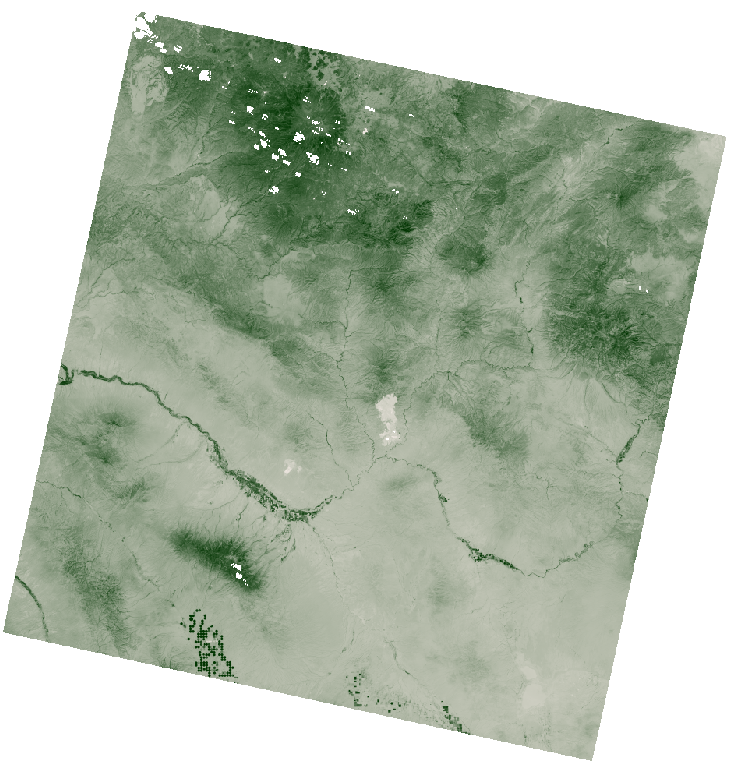

In [15]:
image_url = model_obj.ndvi\
    .getThumbURL({'min': -0.1, 'max': 0.9, 'palette': ndvi_palette, 
                  'region': landsat_region, 'dimensions': image_size})
Image(image_url, embed=True, format='png')

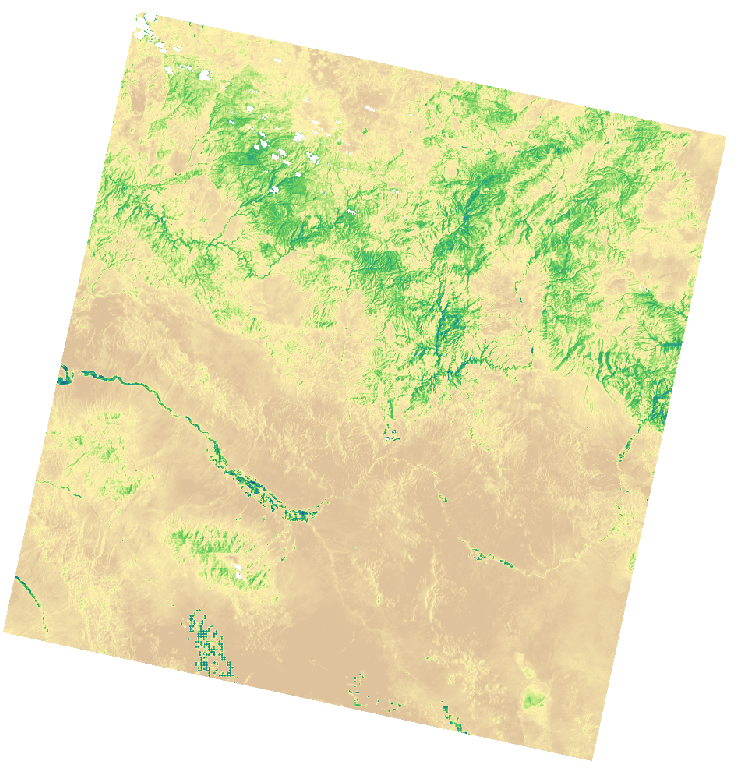

In [16]:
image_url = model_obj.et\
    .getThumbURL({'min': 0.0, 'max': 15, 'palette': et_palette, 
                  'region': landsat_region, 'dimensions': image_size})
Image(image_url, embed=True, format='png')

In [ ]:
### output the ET image
